LendingClubCaseStudy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warn
warn.filterwarnings("ignore")

Reading the Dataset

In [2]:
df=pd.read_csv('loan.csv',low_memory=False)
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cleaning the dataset

In [3]:
#Checking the percentage of Nan values in dataset
percentage_null=round(df.isnull().sum() * 100 / len(df),2)
percentage_null

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [4]:
#Dropping the Columns having greater or equal to 75% Nan values
df=df.drop(percentage_null[percentage_null>=75.0].index,axis=1)
df.shape

(39717, 55)

In [5]:
# Finding the columns having unique data
# Sorted unique values based on the columns
# Dropping the unnecessary columns as per the column's data uniqueness
# dropped columns [tax_liens, delinq_amnt, chargeoff_within_12_mths, acc_now_delinq, application_type, policy_code, collections_12_mths_ex_med, initial_list_status pymnt_plan]

columns_with_unique_values=df.nunique().sort_values()
df_unique_values = columns_with_unique_values.to_frame().reset_index()
df_unique_values.rename(columns = {'index':'names',0:'uniquecount'},inplace = True)
df_unique_values=df_unique_values[df_unique_values.uniquecount==1]
df_unique_values
df=df.drop(columns=df_unique_values['names'][0:len(df_unique_values)],axis=1)
df.shape

(39717, 46)

In [6]:
#Dropping the columns which are not required for the data analysis (Customer behaviour)
df=df.drop(columns=['delinq_2yrs','id','member_id','desc','title','zip_code','mths_since_last_delinq','pub_rec_bankruptcies','emp_title','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','url'],axis=1)
df.shape



(39717, 19)

In [7]:
#Dropping the rows home_ownership is having NONE values
df=df[df.home_ownership!='NONE']

#Dropping the rows home_ownership is having Other values
df=df[df.home_ownership!='OTHER']

#Dropping the rows loan_status is having Current Value
df=df[df.loan_status!="Current"]

# Splitting the issue_d colum for month
# df['issue_month']=pd.DatetimeIndex(df.issue_d).month

In [8]:
#Removing the % from int_rate column
df.int_rate=df.int_rate.str.strip("%").astype(float)
#Removing the % from revol_util column 
#revol_util column is customer behaviour column can be removed if not required
df.revol_util=df.revol_util.str.strip("%").astype(float)
#Converting the term column to integers ( eg: 36 months as 36)
df.term=df.term.str.strip("months").astype(int)
#Formatting issue_d
df.issue_d=pd.to_datetime(df.issue_d,format='%b-%y')
#converting installment column to int
df.installment=df.installment.astype(int)


In [9]:
#Approved ratio of loan amount (funded_amnt_inv/loan_amnt)*100

df['loan_amnt_approved_ratio']=round((df.funded_amnt_inv*100)/(df.loan_amnt),2)


In [10]:
#Manipulating the subgrading to numeric values for better visualization

sub_grad_manipulation=df.sub_grade.apply(lambda x:x[-1])
df.sub_grade=pd.to_numeric(sub_grad_manipulation)

In [11]:
#emp_length column modification to number of years ( eg: 6 years as 6)
#Filling the empty cells of emp_length with 0
#If emp lenght is less than 1 year round off to 0
#If emp lenght is greater than 10 years round off to 10

df.emp_length.fillna(df.emp_length.mode()[0], inplace = True)

df.emp_length.isna().sum()

df.emp_length=pd.to_numeric(df.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [12]:
#Converting final data after cleaning to csv file

df.to_csv('loan_data.csv', index = False, encoding='utf-8') # False: not include index
#print(df)

Uni Variate Analysis

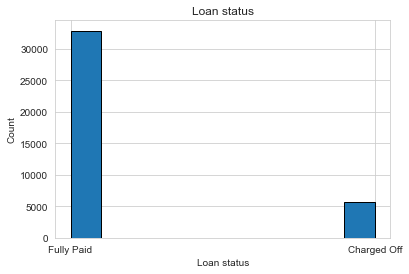

In [13]:
#Histogram

plt.hist(df.loan_status,ec='black')
plt.xlabel('Loan status')
plt.ylabel("Count")
plt.title("Loan status")
plt.show()


Around 5000 people who are defaulters in the loan status from the above graph

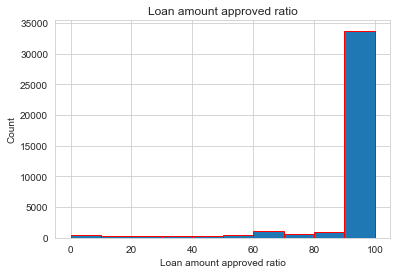

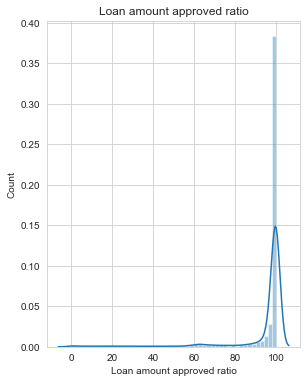

In [14]:
plt.hist(df.loan_amnt_approved_ratio,bins=10,ec='red')
plt.xlabel('Loan amount approved ratio')
plt.ylabel("Count")
plt.title("Loan amount approved ratio")
plt.show()

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(x=df.loan_amnt_approved_ratio)
plt.xlabel('Loan amount approved ratio')
plt.ylabel("Count")
plt.title("Loan amount approved ratio")
plt.show()

Maximun loan amount approved ratio is in between 90% - 100% from the above graph

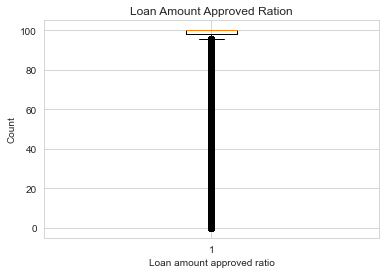

In [15]:
plt.boxplot(df.loan_amnt_approved_ratio)
plt.xlabel('Loan amount approved ratio')
plt.ylabel("Count")
plt.title("Loan Amount Approved Ration")
plt.show()

Minimum value of Loan amount approved ratio lies in between 90%-100% from the above graph

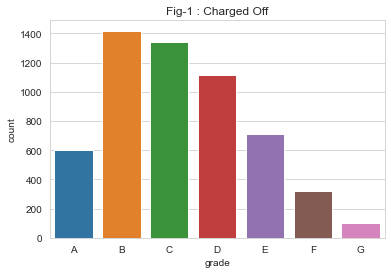

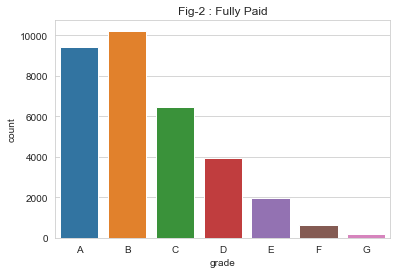

In [16]:
sns.countplot(x='grade',order=['A','B','C','D','E','F','G'],data=df[df.loan_status=='Charged Off'])
plt.title("Fig-1 : Charged Off")
plt.show()
sns.countplot(x='grade',order=['A','B','C','D','E','F','G'],data=df[df.loan_status=='Fully Paid'])
plt.title("Fig-2 : Fully Paid")
plt.show()

Maximum number of charged off loans is happend in the grade B category from Fig-1  

Maximum number of charged off loans is happend in the grade B category from Fig-2

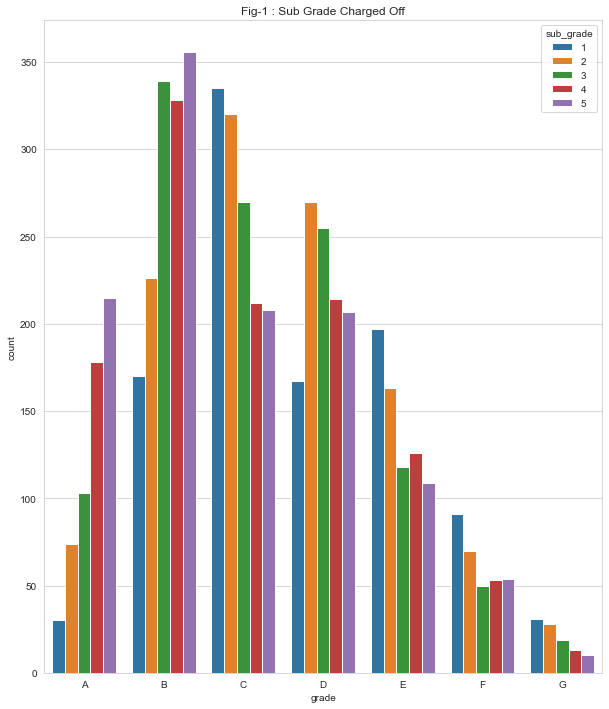

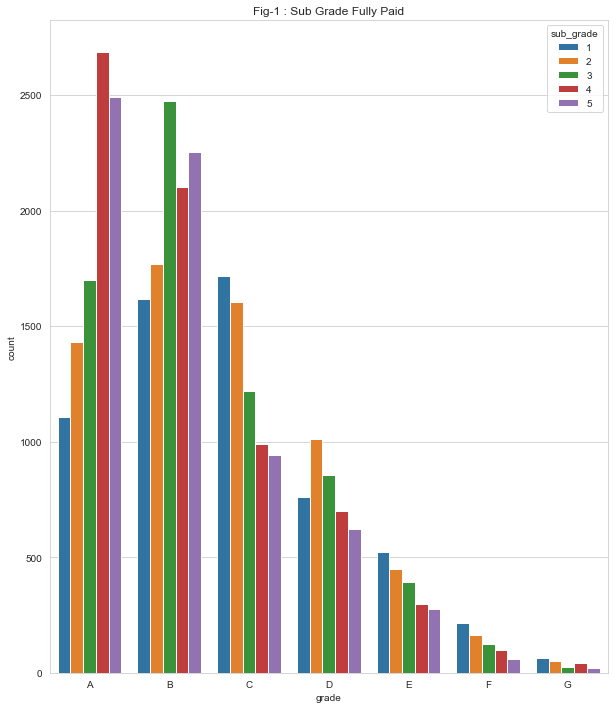

In [17]:
plt.figure(figsize=(10,12))
sns.countplot(x='grade',order=['A','B','C','D','E','F','G'],hue='sub_grade',data=df[df.loan_status=='Charged Off'])
plt.title("Fig-1 : Sub Grade Charged Off")
plt.show()
plt.figure(figsize=(10,12))
sns.countplot(x='grade',order=['A','B','C','D','E','F','G'],hue='sub_grade',data=df[df.loan_status=='Fully Paid'])
plt.title("Fig-1 : Sub Grade Fully Paid")
plt.show()

In [18]:
# Maximum number of charged off loans is happend in the grade B category from Fig-1  

# Maximum number of charged off loans is happend in the grade B category from Fig-2

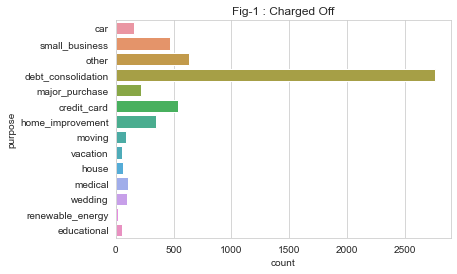

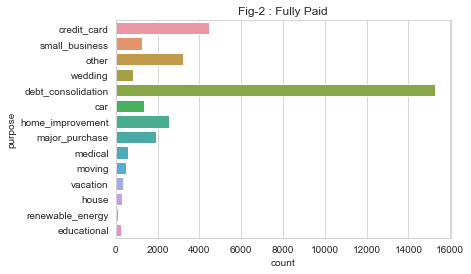

In [19]:
sns.countplot(y='purpose',data=df[df.loan_status=='Charged Off'])
plt.title("Fig-1 : Charged Off")
plt.show()
sns.countplot(y='purpose',data=df[df.loan_status=='Fully Paid'])
plt.title("Fig-2 : Fully Paid")
plt.show()

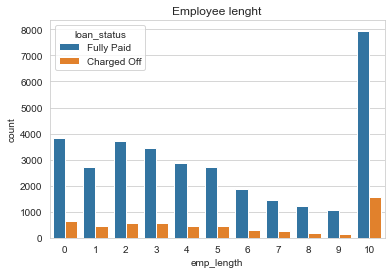

In [20]:
sns.countplot(x='emp_length',hue='loan_status',data=df)
plt.title("Employee lenght")
plt.show()

As per the above graph if emp lenght is more than 10 years charged off is more


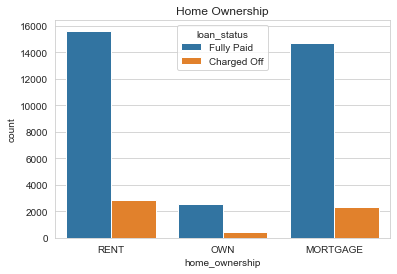

In [21]:
sns.countplot(x='home_ownership',hue='loan_status',data=df)
plt.title("Home Ownership")
plt.show()

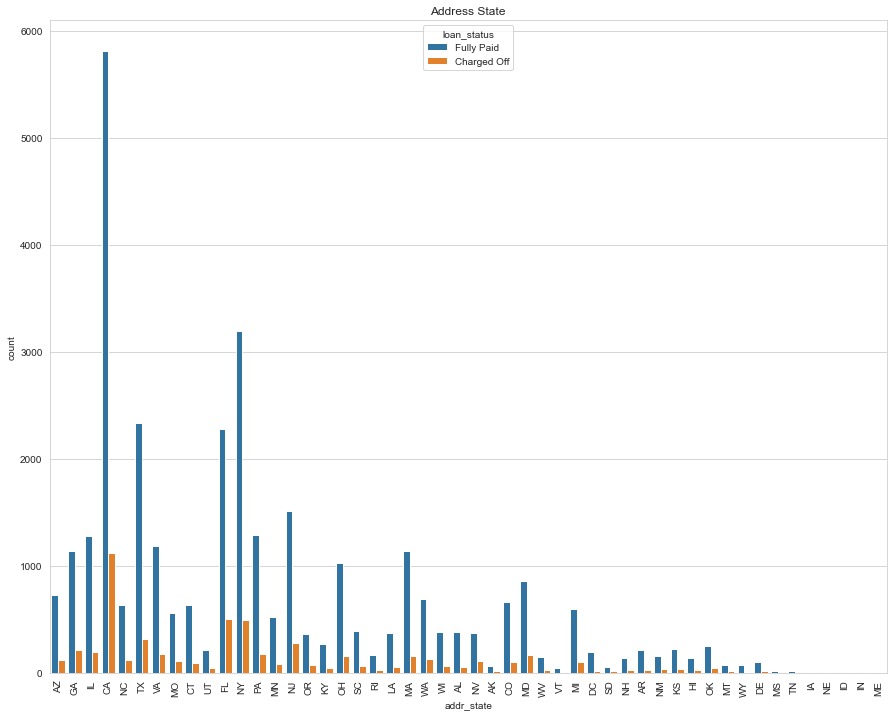

In [22]:
plt.figure(figsize=(15,12))
sns.countplot(x='addr_state',hue='loan_status',data=df)
plt.xticks(rotation=90)
plt.title("Address State")
plt.show()

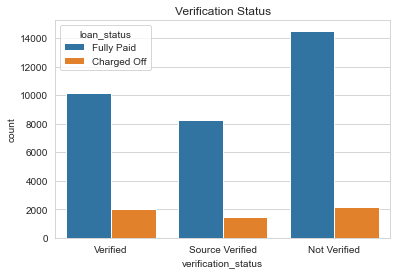

In [23]:
sns.countplot(x='verification_status',hue='loan_status',data=df)
plt.title("Verification Status")
plt.show()

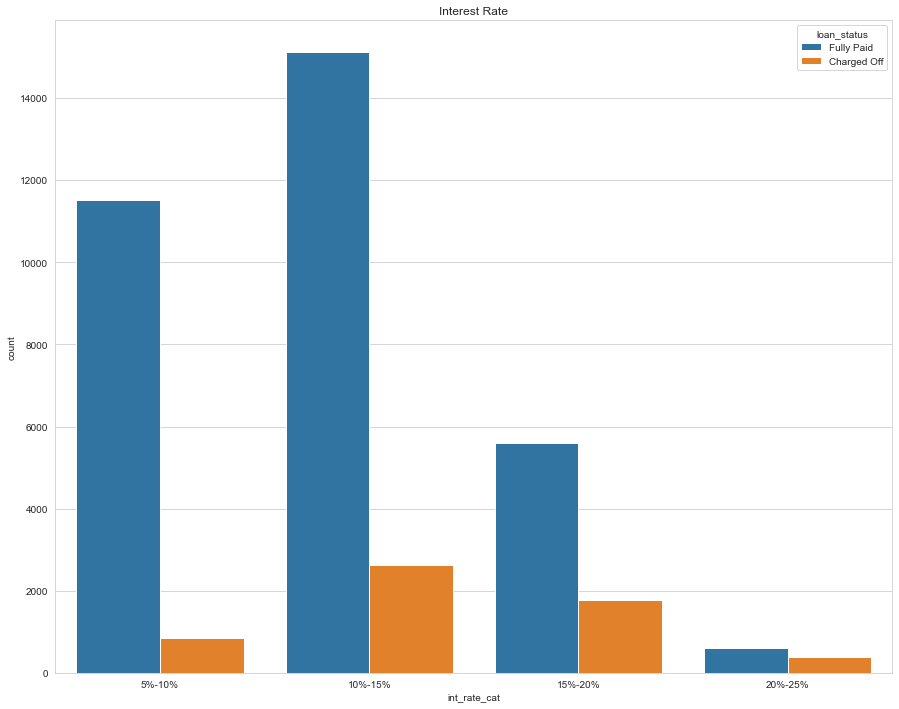

In [24]:
plt.figure(figsize=(15,12))
df['int_rate_cat']=pd.cut(df.int_rate,bins=4,labels=['5%-10%','10%-15%','15%-20%','20%-25%'])
sns.countplot(x='int_rate_cat',hue='loan_status',data=df)
plt.title("Interest Rate")
plt.show()

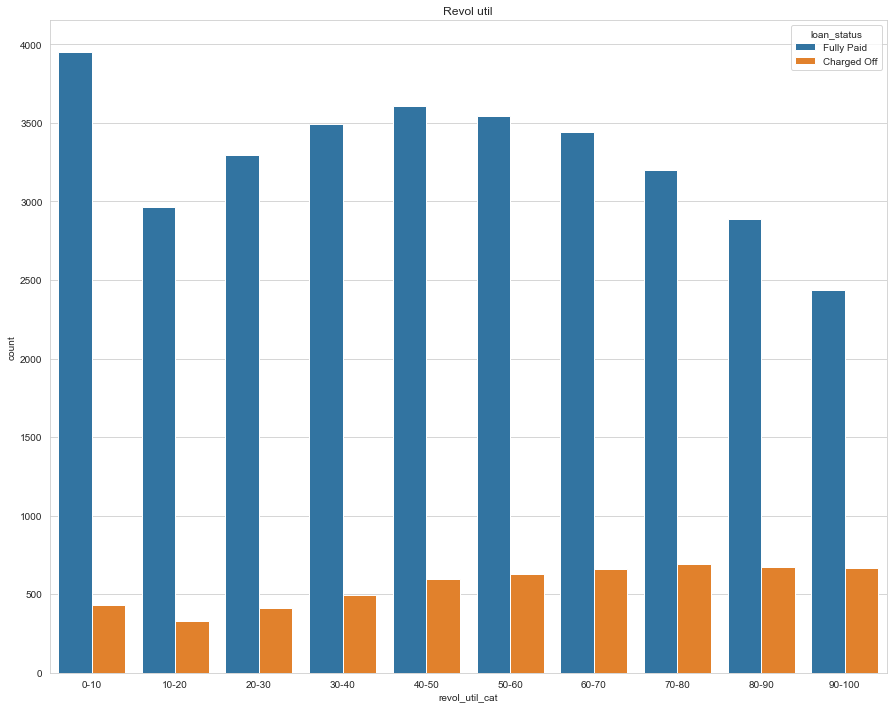

In [25]:
plt.figure(figsize=(15,12))
df['revol_util_cat']=pd.cut(df.revol_util,bins=10,labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])
sns.countplot(x='revol_util_cat',hue='loan_status',data=df)
plt.title("Revol util")
plt.show()

Revol util 70-80 we are having more charge off loan status from the above graph

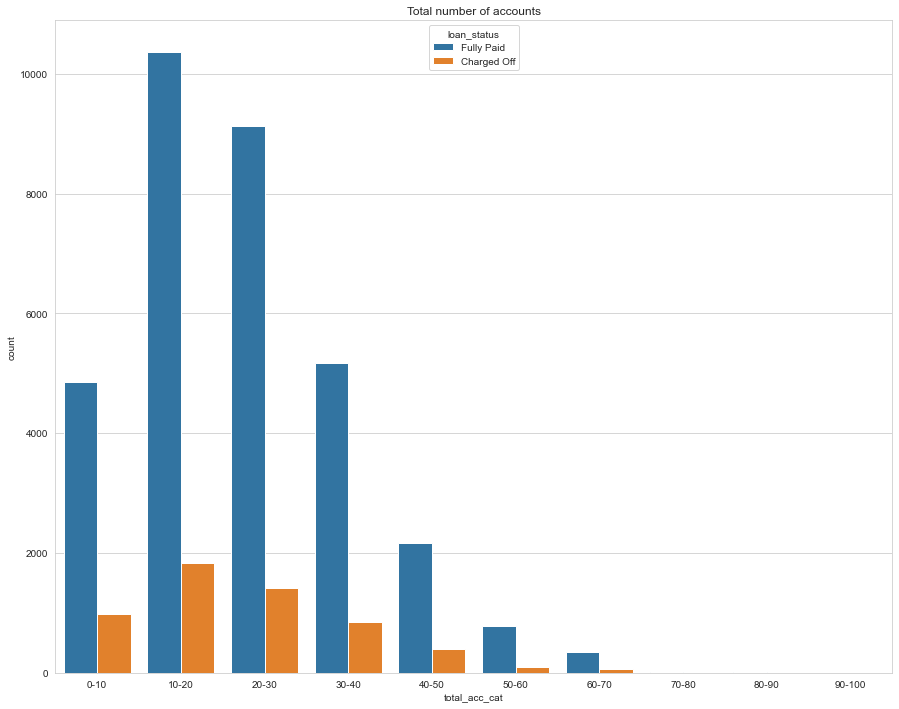

In [26]:
plt.figure(figsize=(15,12))
df['total_acc_cat']=pd.cut(df.total_acc,bins=10,labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])
sns.countplot(x='total_acc_cat',hue='loan_status',data=df)
plt.title("Total number of accounts")
plt.show()

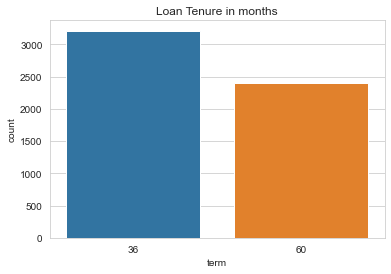

In [27]:
# sns.countplot(x='term',hue='loan_status',data=df)
# plt.title("Loan Tenure in months")
# plt.show()

#univariate
sns.countplot(x='term',data=df[df.loan_status=='Charged Off'])
plt.title("Loan Tenure in months")
plt.show()

In [29]:
# sns.countplot(x='issue_month', data=df[df.loan_status=="Charged Off"])
# plt.show()

In [30]:
#Approved ratio of loan amount (funded_amnt_inv/loan_amnt)*100

df['loan_amnt_approved_ratio']=round((df.funded_amnt_inv*100)/(df.loan_amnt),2)


In [31]:
#annual_inc
df.annual_inc[14]

100000.0

In [32]:
#Converting final data after cleaning to csv file

df.to_csv('loan_data.csv', index = False, encoding='utf-8') # False: not include index
#print(df)

Uni Variate Analysis

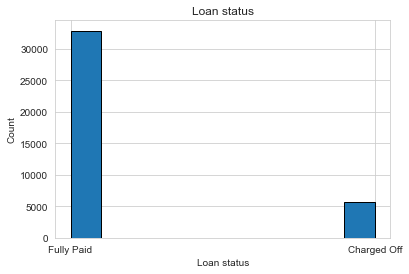

In [33]:
#Histogram

plt.hist(df.loan_status,ec='black')
plt.xlabel('Loan status')
plt.ylabel("Count")
plt.title("Loan status")
plt.show()


Around 5000 people who are defaulters in the loan status from the above graph

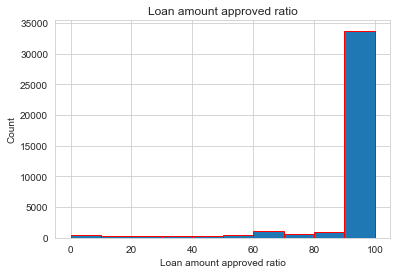

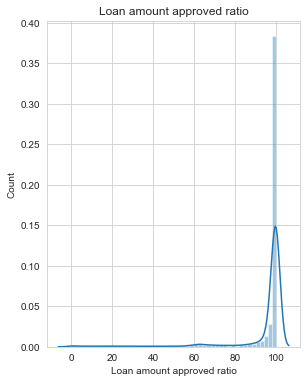

In [34]:
plt.hist(df.loan_amnt_approved_ratio,bins=10,ec='red')
plt.xlabel('Loan amount approved ratio')
plt.ylabel("Count")
plt.title("Loan amount approved ratio")
plt.show()

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(x=df.loan_amnt_approved_ratio)
plt.xlabel('Loan amount approved ratio')
plt.ylabel("Count")
plt.title("Loan amount approved ratio")
plt.show()

Maximun loan amount approved ratio is in between 90% - 100% from the above graph

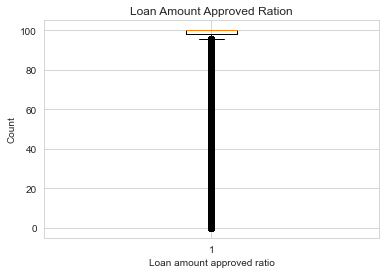

In [35]:
plt.boxplot(df.loan_amnt_approved_ratio)
plt.xlabel('Loan amount approved ratio')
plt.ylabel("Count")
plt.title("Loan Amount Approved Ration")
plt.show()

Minimum value of Loan amount approved ratio lies in between 90%-100% from the above graph

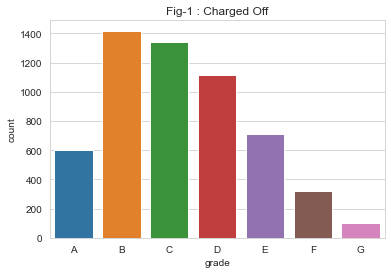

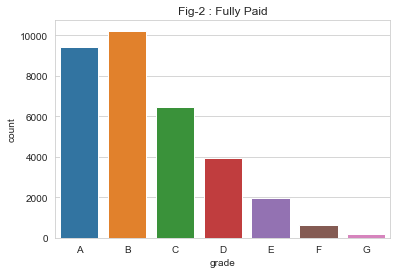

In [36]:
sns.countplot(x='grade',order=['A','B','C','D','E','F','G'],data=df[df.loan_status=='Charged Off'])
plt.title("Fig-1 : Charged Off")
plt.show()
sns.countplot(x='grade',order=['A','B','C','D','E','F','G'],data=df[df.loan_status=='Fully Paid'])
plt.title("Fig-2 : Fully Paid")
plt.show()

Maximum number of charged off loans is happend in the grade B category from Fig-1  

Maximum number of charged off loans is happend in the grade B category from Fig-2

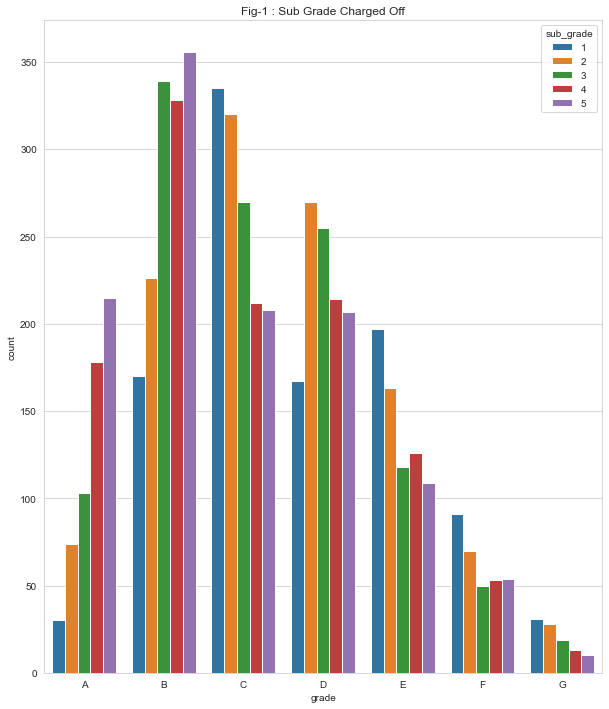

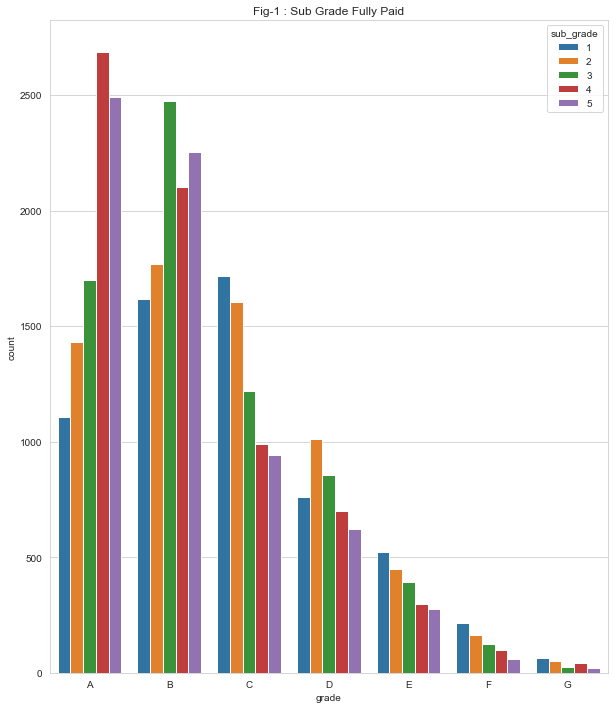

In [37]:
plt.figure(figsize=(10,12))
sns.countplot(x='grade',order=['A','B','C','D','E','F','G'],hue='sub_grade',data=df[df.loan_status=='Charged Off'])
plt.title("Fig-1 : Sub Grade Charged Off")
plt.show()
plt.figure(figsize=(10,12))
sns.countplot(x='grade',order=['A','B','C','D','E','F','G'],hue='sub_grade',data=df[df.loan_status=='Fully Paid'])
plt.title("Fig-1 : Sub Grade Fully Paid")
plt.show()

<!-- Maximum number of charged off loans is happend in the grade B category from Fig-1  

Maximum number of charged off loans is happend in the grade B category from Fig-2
 -->

In [38]:
# Maximum number of charged off loans is happend in the grade B category from Fig-1  

# Maximum number of charged off loans is happend in the grade B category from Fig-2

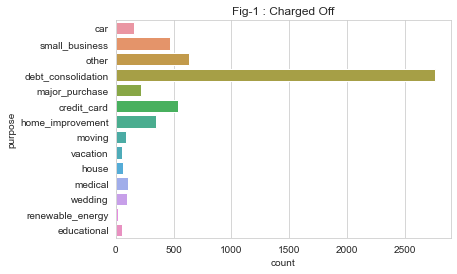

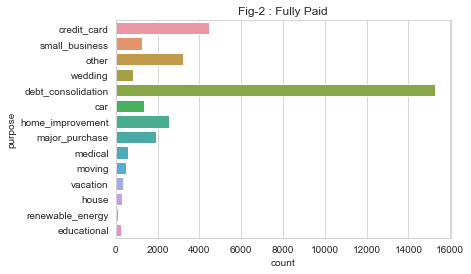

In [39]:
sns.countplot(y='purpose',data=df[df.loan_status=='Charged Off'])
plt.title("Fig-1 : Charged Off")
plt.show()
sns.countplot(y='purpose',data=df[df.loan_status=='Fully Paid'])
plt.title("Fig-2 : Fully Paid")
plt.show()

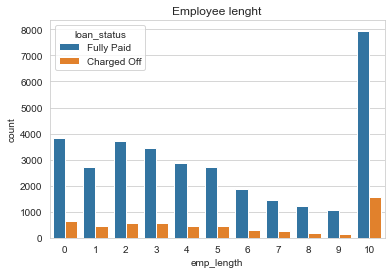

In [40]:
sns.countplot(x='emp_length',hue='loan_status',data=df)
plt.title("Employee lenght")
plt.show()

As per the above graph if emp lenght is more than 10 years charged off is more


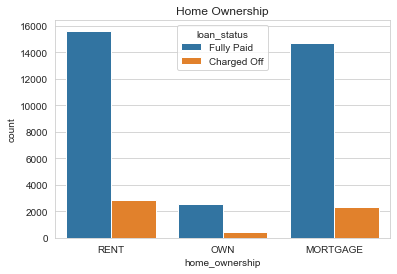

In [41]:
sns.countplot(x='home_ownership',hue='loan_status',data=df)
plt.title("Home Ownership")
plt.show()

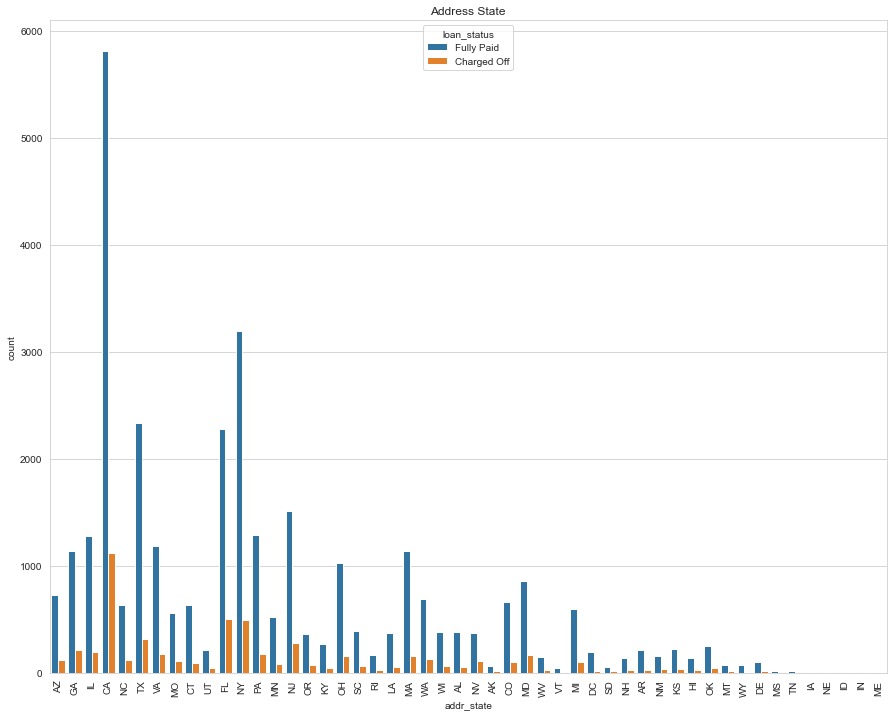

In [42]:
plt.figure(figsize=(15,12))
sns.countplot(x='addr_state',hue='loan_status',data=df)
plt.xticks(rotation=90)
plt.title("Address State")
plt.show()

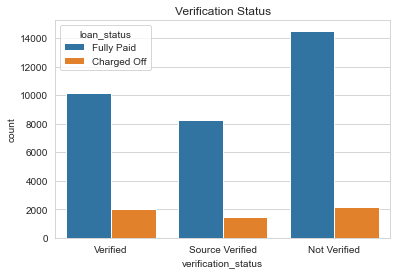

In [43]:
sns.countplot(x='verification_status',hue='loan_status',data=df)
plt.title("Verification Status")
plt.show()

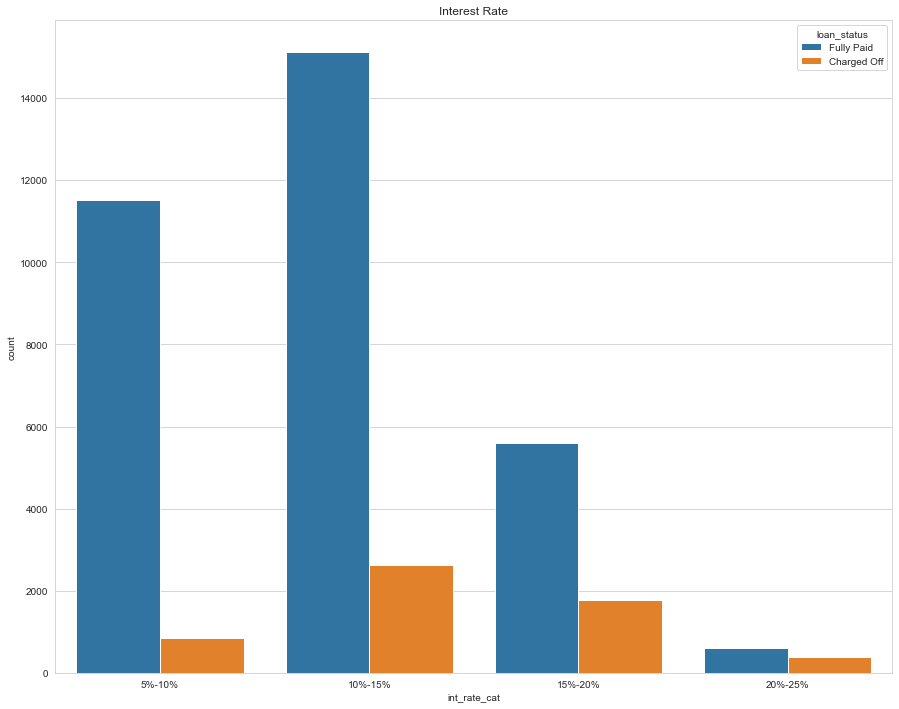

In [44]:
plt.figure(figsize=(15,12))
df['int_rate_cat']=pd.cut(df.int_rate,bins=4,labels=['5%-10%','10%-15%','15%-20%','20%-25%'])
sns.countplot(x='int_rate_cat',hue='loan_status',data=df)
plt.title("Interest Rate")
plt.show()

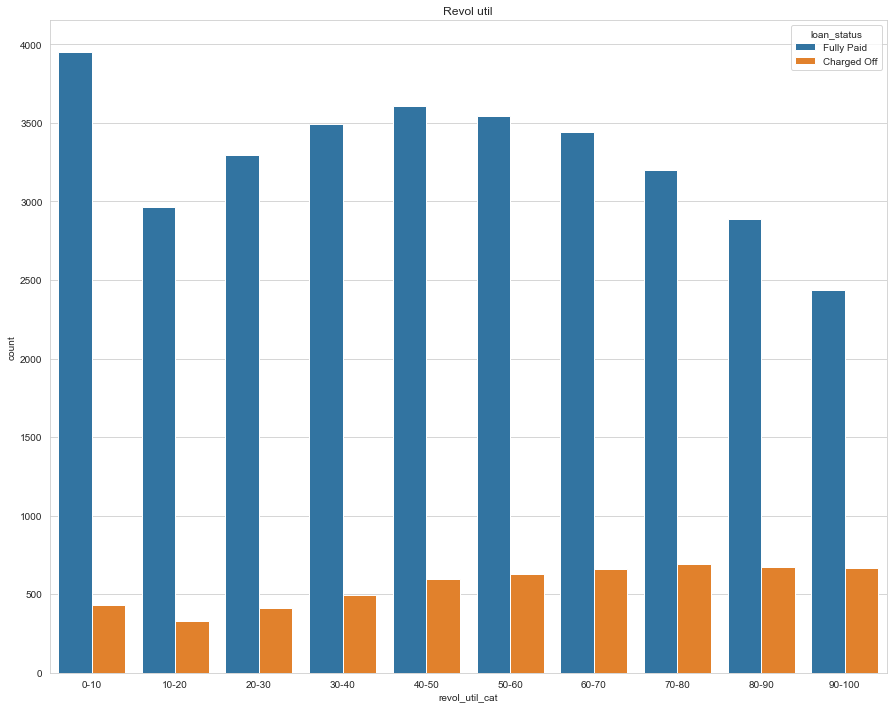

In [45]:
plt.figure(figsize=(15,12))
df['revol_util_cat']=pd.cut(df.revol_util,bins=10,labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])
sns.countplot(x='revol_util_cat',hue='loan_status',data=df)
plt.title("Revol util")
plt.show()

Revol util 70-80 we are having more charge off loan status from the above graph

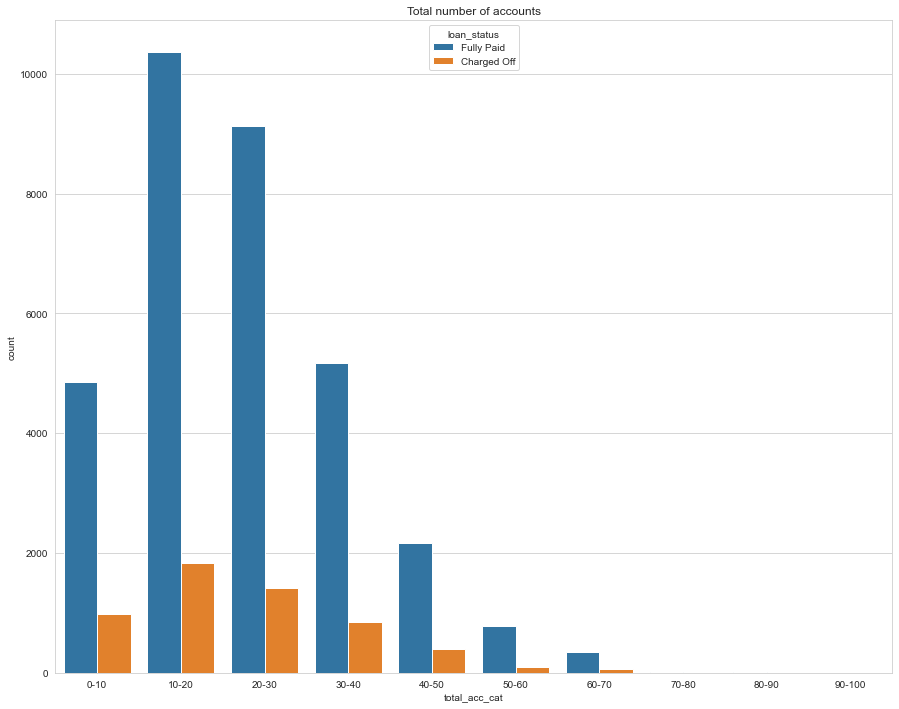

In [46]:
plt.figure(figsize=(15,12))
df['total_acc_cat']=pd.cut(df.total_acc,bins=10,labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])
sns.countplot(x='total_acc_cat',hue='loan_status',data=df)
plt.title("Total number of accounts")
plt.show()

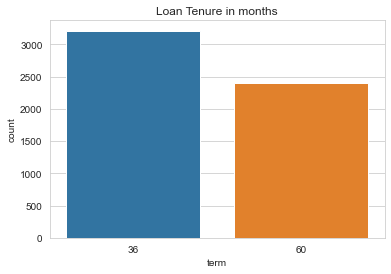

In [47]:
# sns.countplot(x='term',hue='loan_status',data=df)
# plt.title("Loan Tenure in months")
# plt.show()

#univariate
sns.countplot(x='term',data=df[df.loan_status=='Charged Off'])
plt.title("Loan Tenure in months")
plt.show()

In [64]:
df['loan_amnt_cat']=pd.cut(df.loan_amnt,bins=4,labels=['0-10k','10k-20k','20k-30k','30k-40k'])

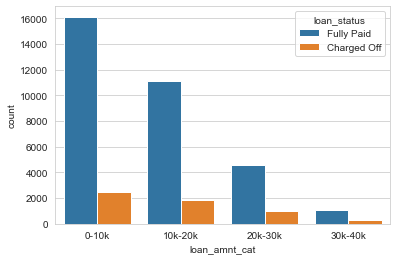

In [71]:
sns.countplot(x='loan_amnt_cat', hue='loan_status',data=df)
plt.show()

More charged off and fully paid is happened in 0 to 10000 range

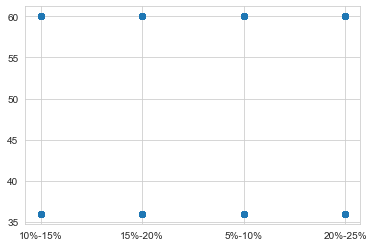

In [49]:
# intrest rate vs tenure length
df['int_rate_cat']=pd.cut(df.int_rate,bins=4,labels=['5%-10%','10%-15%','15%-20%','20%-25%'])
plt.scatter(df.int_rate_cat,df.term)
plt.show()

As per the above graph interest rate is not dependent on term plan

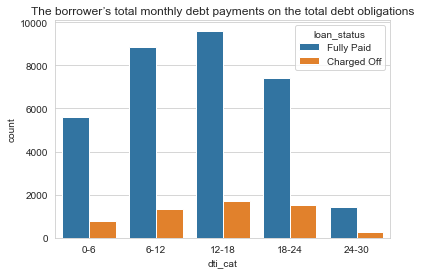

In [50]:
df['dti_cat']=pd.cut(df.dti,bins=5,labels=['0-6','6-12','12-18','18-24', '24-30'])
sns.countplot(x='dti_cat',hue='loan_status', data=df)
plt.title("The borrower’s total monthly debt payments on the total debt obligations")
plt.show()

Dti between 12-18 having more charged off when compared with other ranges

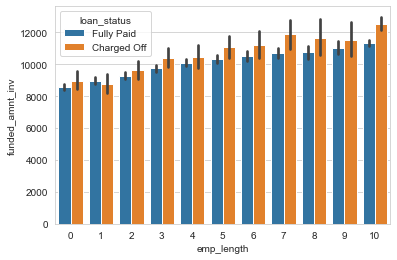

In [51]:
sns.barplot(data=df, x="emp_length", y="funded_amnt_inv", hue="loan_status")
plt.show()

Emp having 10 yrs having more charged off for funded loan amount investment 12000+

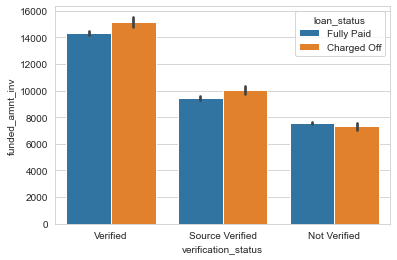

In [52]:
sns.barplot(data=df, x="verification_status", y="funded_amnt_inv", hue="loan_status")
plt.show()

More charged off is in verified status in between 14000 to 16000 funded amount investment

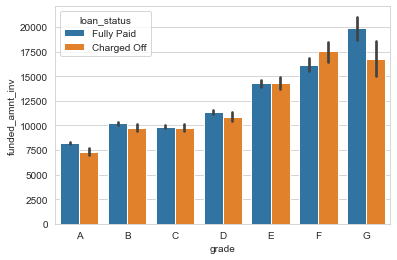

In [61]:
sns.barplot(data=df, x="grade", y="funded_amnt_inv", hue="loan_status", order=['A','B','C','D','E','F','G'])
plt.show()

17500 funded amount investment have more charged off in F grade

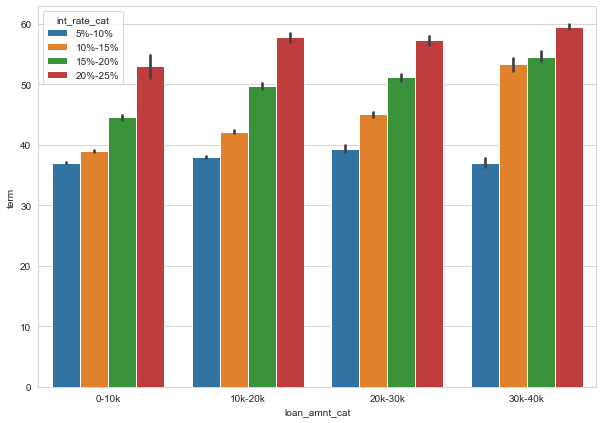

In [81]:
plt.figure(figsize=(10,7))
sns.barplot(data=df, x="loan_amnt_cat", y="term", hue="int_rate_cat")
plt.show()

if loan amount range between 30k to 40k then interest is also high

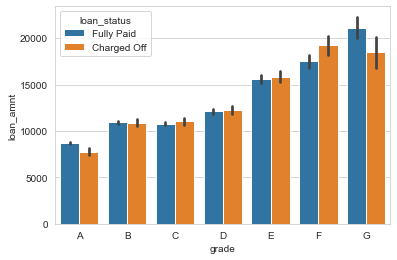

In [84]:
sns.barplot(data=df, x="grade", y="loan_amnt", hue="loan_status", order=['A','B','C','D','E','F','G'])
plt.show()

18k - 20k loan amount have more charged off in F grade